# Kubische Splines mit eingespanntem Rand

Wir geben die $n+1$ $x$-Werte und $y$-Werte $(x_0,y_0),\ldots,(x_n, y_n)$ vor.

Gesucht ist die Spline Funktion $s(x)$ mit $s(x_i) = y_i$.

Die Lösung ergibt sich abschnittsweise mit Hilfe von Hermite-Polynomen, wie auf wie im Skript, man setzt jedoch $x=t$ und erhält so Funktionsgraphen.

Das Gleichungssystem, das gelöst werden muss ist
$$ \begin{pmatrix}
   4 & 1 & 0 & 0 & 0 & \ldots & 0 \\
   1 & 4 & 1 & 0 & 0 & \ldots & 0 \\
   0 & 1 & 4 & 1 & 0 & \ldots & 0 \\
   \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
   \vdots &  &  \ddots & \ddots & \ddots & \ddots & \vdots \\
   0 & \ldots & \ldots & 0 & 1 & 4 & 1 \\
   0 & \ldots & \ldots & 0 & 0 & 1 & 4
   \end{pmatrix}
   \cdot
   \begin{pmatrix} y_1' \\ y_2' \\ \vdots \\ \vdots \\ y_{n-1}' \end{pmatrix}
   = 3 \cdot
   \begin{pmatrix} y_2 - y_0\\ y_3 - y_1 \\  \vdots \\ \vdots \\ y_n - y_{n-2}  \end{pmatrix}
   - \begin{pmatrix} y_0' \\ 0 \\ \vdots \\ 0 \\ y_n'  \end{pmatrix}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def h(x, y0, y1, y0s, y1s):
    # Das Hermite-Polynom, dass einen Funktionsabschnitt erzeugt
    # 0 <= x <= 1
    # h(0) = y0, h(1) = y1
    # h'(0) = y0s, h'(1) = y1s
    return (2*y0-2*y1+y0s+y1s)*x**3 + (-3*y0 + 3*y1 - 2*y0s - y1s)*x**2 + y0s*x + y0

def hs(x, y0, y1, y0s, y1s):
    # Die Ableitung des Hermite-Polynoms
    # 0 <= x <= 1
    return (2*y0-2*y1+y0s+y1s)*3*x**2 + (-3*y0 + 3*y1 - 2*y0s - y1s)*2*x + y0s

def solveGls(y, y0s, yns):
    n = len(y)-1
    A = 4 * np.eye(n-1) + np.diag([1]*(n-2),1) + np.diag([1]*(n-2),-1)
    b = 3*(y[2:] - y[:-2])
    b[0] -= y0s
    b[n-2] -= yns
    return np.linalg.solve(A, b)  # returns y1s,..., y(n-1)s

def s(t, x, y, ys):
    # Berechne den B-Spline für x=t
    # x = (x0, ..., xn), x0 < x1 < ... < xn
    # y = (y0, ..., yn)
    # ys = (y0s, ..., yns), die Ableitungen/Steigungen
    n = len(x)-1
    # finde das Intevall xi <= t <= x(i+1)
    i = 0
    while i < n+1:
        if x[i] <= t <= x[i+1]:
            break
        i += 1
    # Berechen das i-te Hermitepolynom, [xi, x(i+1)] -> [0,1]
    t = (t-x[i])/(x[i+1]-x[i])  # Umparametrisierung
    return h(t, y[i], y[i+1], ys[i], ys[i+1])

def ss(t, x, y, ys):
    # Berechnet die Ableitung des B-Splines für x=t
    # x = (x0, ..., xn), x0 < x1 < ... < xn
    # y = (y0, ..., yn)
    # ys = (y0s, ..., yns), die Ableitungen/Steigungen
    n = len(x)-1
    # finde das Intevall xi <= t <= x(i+1)
    i = 0
    while i < n+1:
        if x[i] <= t <= x[i+1]:
            break
        i += 1
    # Berechen das i-te Hermitepolynom, [xi, x(i+1)] -> [0,1]
    t = (t-x[i])/(x[i+1]-x[i])  # Umparametrisierung
    return hs(t, y[i], y[i+1], ys[i], ys[i+1]) / (x[i+1]-x[i])  # Kettenregel!

[0.0665 0.     0.     0.0665]
[0.0665     0.42663784 0.42663784 0.0665    ]


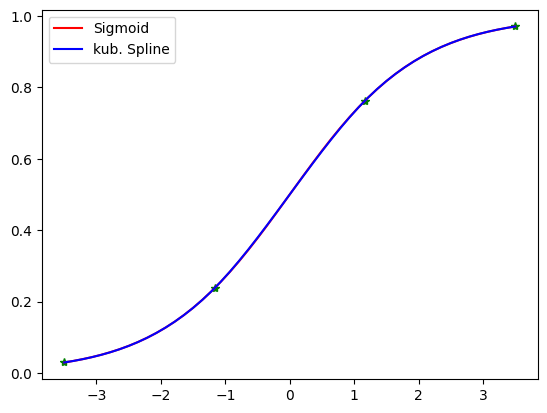

In [3]:
# Beispiel die Sigmoid-Funktion mit Hilfe eines kubsichen Splines
n = 3  # 2 Funktionsabschnitte
x = np.linspace(-3.5, 3.5, n+1)
y = 1/(1+np.exp(-x))
plt.plot(x, y, '*g')
# Berechne einmalig die fehlenden Ableitungen y1s, ..., y(n-1)s
ys = np.zeros(n+1)
ys[0] = 0.0285*(x[1]-x[0])  # Die Ableitung der Sigmoid-Funktionn ist 0.02845 bei ±3.5, wegen der Umparametrisierung muss noch skaliert werden für den B-Spline
ys[n] = 0.0285*(x[n]-x[n-1])
print(ys)
ys[1:n] = solveGls(y, ys[0], ys[n])
print(ys)
# Plotte die Sigmoid-Funktion und den B-Spline
xp = np.linspace(-3.5, 3.5, 50)
plt.plot(xp, 1/(1+np.exp(-xp)), '-r', label='Sigmoid')
yp = [s(t, x, y, ys) for t in xp]
plt.plot(xp, yp, '-b', label='kub. Spline')
plt.legend()

In [3]:
ss(3.5, x, y, ys)

np.float64(0.02849999999999994)